# Standard RB Demo

This is a very basic implemention of a standard RB experiment

In [1]:
import numpy as np
import qiskit_experiments as qe
rb = qe.randomized_benchmarking

# For simulation
from qiskit.test.mock import FakeParis
backend = FakeParis()

## Running 1-qubit RB

---------------------------------------------------
Experiment: RBExperiment
Experiment ID: ad68c446-7cb4-4b89-8c75-520b0b83902d
Status: COMPLETE
Circuits: 140
Analysis Results: 1
---------------------------------------------------
Last Analysis Result
- popt: [0.39686901 0.9968324  0.56018556]
- popt_keys: None
- popt_err: [0.00930198 0.00012858 0.00957537]
- pcov: [[ 8.65267737e-05  1.15558772e-06 -8.88173704e-05]
 [ 1.15558772e-06  1.65327564e-08 -1.20201428e-06]
 [-8.88173704e-05 -1.20201428e-06  9.16877962e-05]]
- reduced_chisq: 388.46076795461363
- dof: 11
- xrange: [1, 500]
- EPC: 0.0015838000563520027
- EPC_err: 6.449417510365912e-05
- plabels: ['A', 'alpha', 'B']

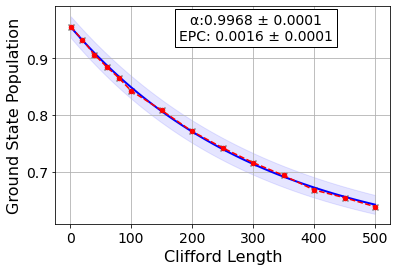

In [2]:
lengths = [1, 20, 40, 60, 80, 100, 150, 200, 250, 300, 350, 400, 450, 500]
num_samples = 10
seed = 1010

# Run an RB experiment on qubit 0
exp1 = rb.RBExperiment([0], lengths, num_samples=num_samples, seed=seed)
expdata1 = exp1.run(backend)

# View result data
expdata1

## Running 2-qubit RB

---------------------------------------------------
Experiment: RBExperiment
Experiment ID: c133cf63-fd67-4d52-97c1-b505b099add4
Status: COMPLETE
Circuits: 100
Analysis Results: 1
---------------------------------------------------
Last Analysis Result
- popt: [0.64596559 0.96140732 0.28422628]
- popt_keys: None
- popt_err: [0.00487162 0.00058143 0.00209837]
- pcov: [[ 2.37327077e-05 -1.87697724e-08 -3.52987578e-06]
 [-1.87697724e-08  3.38058778e-07 -9.09663098e-07]
 [-3.52987578e-06 -9.09663098e-07  4.40313680e-06]]
- reduced_chisq: 532.6350849004282
- dof: 7
- xrange: [1, 200]
- EPC: 0.028944510776536536
- EPC_err: 0.000453575875974297
- plabels: ['A', 'alpha', 'B']

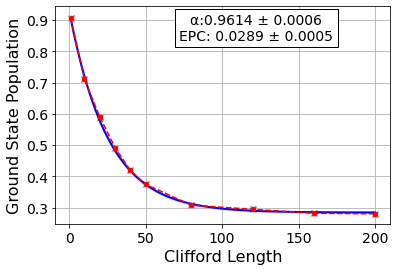

In [3]:
lengths = [1, 10, 20, 30, 40, 50, 80, 120, 160, 200]
num_samples = 10
seed = 1010

# Run an RB experiment on qubits 0,
exp2 = rb.RBExperiment([0, 1], lengths, num_samples=num_samples, seed=seed)
expdata2 = exp2.run(backend)

# View result data
expdata2

## Running parallel RB experiments

---------------------------------------------------
Experiment: ParallelExperiment
Experiment ID: d670490f-77d8-4110-ac7f-f4e611963cac
Status: COMPLETE
Component Experiments: 5
Circuits: 140
Analysis Results: 1
---------------------------------------------------
Last Analysis Result
- experiment_types: ['RBExperiment', 'RBExperiment', 'RBExperiment', 'RBExperiment', 'RBExperiment']
- experiment_ids: ['38052c41-b1de-4044-a7ea-351116323acb', 'deff9141-4adb-4a2a-9c26-8f1dd56d7533', 'd0d62d02-9613-4ddd-9acc-128867b66d9d', '37ad5eb7-d7eb-4e65-b46e-276b8ff8e1de', 'ea5ac2b9-3082-433a-bc06-0b636f9ff700']
- experiment_qubits: [(0,), (1,), (2,), (3,), (4,)]

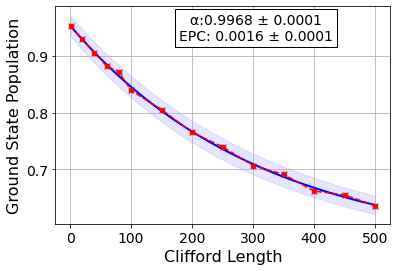

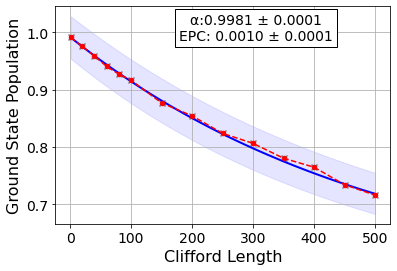

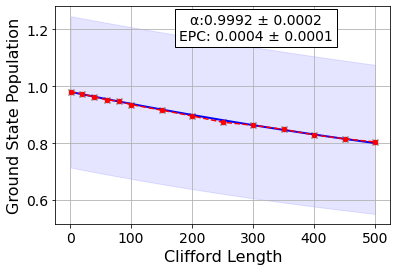

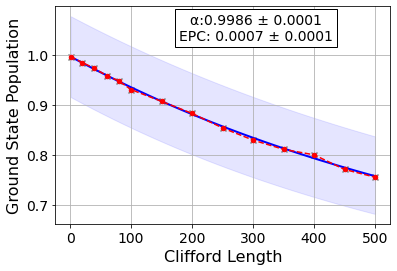

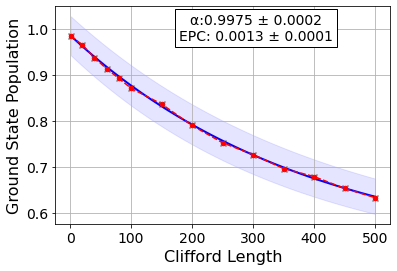

In [4]:
lengths = [1, 20, 40, 60, 80, 100, 150, 200, 250, 300, 350, 400, 450, 500]
num_samples = 10
seed1 = 1010

exps = [rb.RBExperiment([i], lengths, num_samples=num_samples, seed=seed + i)
        for i in range(5)]

par_exp = qe.composite.ParallelExperiment(exps)
par_expdata = par_exp.run(backend)

# View result
par_expdata

#### Viewing sub experiment data

The experiment data returned from a batched experiment also contains individual experiment data for each sub experiment which can be accessed using `experiment_data(index)`

In [5]:
# Print sub-experiment data
for i in range(par_exp.num_experiments):
    print(par_expdata.component_experiment_data(i), '\n')

---------------------------------------------------
Experiment: RBExperiment
Experiment ID: 38052c41-b1de-4044-a7ea-351116323acb
Status: COMPLETE
Circuits: 140
Analysis Results: 1
---------------------------------------------------
Last Analysis Result
- popt: [0.39894313 0.99683541 0.55506056]
- popt_keys: None
- popt_err: [0.00864615 0.00013107 0.00889515]
- pcov: [[ 7.47558822e-05  1.07234670e-06 -7.66189222e-05]
 [ 1.07234670e-06  1.71788812e-08 -1.11871309e-06]
 [-7.66189222e-05 -1.11871309e-06  7.91236855e-05]]
- reduced_chisq: 1272.0160808279704
- dof: 11
- xrange: [1, 500]
- EPC: 0.0015822930393300516
- EPC_err: 6.574216227495952e-05
- plabels: ['A', 'alpha', 'B'] 

---------------------------------------------------
Experiment: RBExperiment
Experiment ID: deff9141-4adb-4a2a-9c26-8f1dd56d7533
Status: COMPLETE
Circuits: 140
Analysis Results: 1
---------------------------------------------------
Last Analysis Result
- popt: [0.44218305 0.99807077 0.54973109]
- popt_keys: None
- p